# [Topic Modeling](https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24)

In [98]:

from pprint import pprint
import numpy as np
np.random.seed(2018)
import nltk

# reload only imported modules before run
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

'''
pantree bank tags: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
standford source: https://nlp.stanford.edu/software/CRF-NER.shtml
standford online text tree generater: http://nlp.stanford.edu:8080/parser/index.jsp
'''

'\npantree bank tags: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html\nstandford source: https://nlp.stanford.edu/software/CRF-NER.shtml\nstandford online text tree generater: http://nlp.stanford.edu:8080/parser/index.jsp\n'

### constants

In [99]:
start_date = '01-11-2018' #  09-Sep-2018 
end_date = '30-12-2018' # 01-Oct-2018

### We will perform the following steps:

#### 1. Tokenization: 
Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.

In [100]:
# def tokenize(text):
#     return gensim.utils.simple_preprocess(text)

#### 2. Remove small words:
Words that have fewer than 3 characters are removed.

In [101]:
# def isShortWord(token):
#     return len(token) < 3

#### 3. Remove stopwords:
All stopwords are removed.

In [102]:
# def isStopWord(token):
#     return token in gensim.parsing.preprocessing.STOPWORDS

#### 4. lemmatized +  Stemming:
Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.

Words are stemmed — words are reduced to their root form.

In [103]:
# from nltk.corpus import wordnet as wn
# from nltk import pos_tag, word_tokenize
# from nltk.stem.porter import *
# from textblob import TextBlob


# def lemmatize_stemming(token):
#     stemmer = PorterStemmer() #gensim.parsing.stem_text(tokenize) #
#     for word, tag in pos_tag(word_tokenize(token)):
#         wntag = tag[0].lower()
#         wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
#         lemma = WordNetLemmatizer().lemmatize(word, wntag) if wntag else word
#         return TextBlob(lemma).words[0].singularize()
#     return ''

#### 5. Replace Emojis:

In [104]:
# ## get emoji characters file path
# def getEmojis():
#     from dataSource import getEmojis
#     comments_file_path = getDataSourcePathFor(emoji_path)
#     return getEmojis(comments_file_path)#.head()

In [105]:
# def hasEmojicon(token):
    
# def replaceEmojicons(token, emojies):
#     pass
    

## Data Source

In [106]:
# def getNounList(sentence='', tokens = []):
#     from nltk import word_tokenize, pos_tag
#     if len(tokens) > 0:    
#         nouns = [token for token, pos in pos_tag(tokens) if pos.startswith('NN')]
#         return nouns
#     else:
#         nouns = [token for token, pos in pos_tag(word_tokenize(sentence)) if pos.startswith('NN')]
#         return nouns

In [107]:
# text = 'I Have done reviewing, Will be seeing by them'
# print(preprocess(text))

In [108]:
# key is file storage path
# def getDataSourcePathFor(keyForFilePath):
#     import json
#     import os
    
#     config_file_path = os.environ[virtual_env] + '/config.json'

#     with open(config_file_path) as f:
#         config = json.load(f)
#         if keyForFilePath in config:# ['comments_path', 'output_path']
#             return config[keyForFilePath] 
#     return None

In [109]:
# ## get list of comments from stored input csv file
# import dataSource 

# def getListOfComments():
#     ### This is to get csv rows between given dates
#     comments_file_path = getDataSourcePathFor(comments_path)
#     commentsList = getComments(comments_file_path, start_date, end_date) #['comments'] 
#     commentsList = commentsList.sort_values(by='ratings', ascending=True)['comments'] 
#     print('Total number of comments: %s between %s and %s' % (len(commentsList), start_date, end_date))
#     return commentsList

### Text processing

In [110]:
# import re

# def filterWord(token):
#     if not (isStopWord(token) or isShortWord(token)):
#         lemmaWord = lemmatize_stemming(token)
#         if not isShortWord(lemmaWord):
#             return ("".join(re.findall("[a-zA-Z]+", lemmaWord)).lower())
#     return None 
    
# def filters(sentence):
# #     print('..given comments:', sentence)
#     result = []
#     #nouns = getNounList(sentence) # fetch only Nouns
#     for token in tokenize(sentence):#nouns: ###tokenize(text):
#         result.append(filterWord(token))
#     return result

# def filterWords(tokens):
#     return list(filter(lambda token: filterWord(token), tokens))

In [111]:
# def preprocessCommentDocument(document):
#     return list(map(lambda sentence: filters(sentence), document))

### Word Cloud

In [112]:
from wordCloud import showWordCloud
def showCloud(topicCollection):
    showWordCloud(topicCollection) 

### Bag of Words on the Data set

In [113]:
def bow(processed_docs):
    dictionary = gensim.corpora.Dictionary(processed_docs)
    bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
    return bow_corpus

### Sentiment

In [114]:
from getSentiment import getSentiment

def getSentFromCommentList(commentList):
    sentimentList = []
    for sentence in commentList:
        sentiment = getSentiment(sentence)
        sentimentList.append(sentiment)
    return sentimentList


def isNegative(sentiment):
    return sentiment > 0.5


def tokenDictWithPosNegSentiment(sentimentList, document):
    sentDict = {}
    size = range(len(document))
    
    for i in size:
        for token in document[i]:
            v = (0, 0, 0) # (neg, pos, freq)
            if token in sentDict:
                v = sentDict[token]
                
            if isNegative(sentimentList[i]):
                v = (v[0]+1, v[1], v[2]+1)
            else:
                v = (v[0], v[1]+1, v[2]+1)
            sentDict[token] = v
    sentDict.pop('', None)
    return sentDict 

### Main()

In [115]:
import SDataSource
import SConstants
from SWordList import SWordList
from sUtility import SUtility
from sPreprocessor import SPreprocessor


In [116]:
sutility = SUtility()
spreprocessor = SPreprocessor()

# SPreprocessor.resolveDependancy(trieCommon)
dateBetween = [start_date, end_date]
commentsDocument = SDataSource.getListOfComments(dateBetween)#.head(1000)
print('filtered comments: ', len(commentsDocument))
# document preprocessing, cleaning, filtering, replacement, spliting into multiple senetnces from one
processed_doc = []
for sentence in commentsDocument:
    for each in spreprocessor.docCleaning(sentence, False): #should split by ','
        processed_doc.append(each)


Total number of comments: 972 between 01-11-2018 and 30-12-2018
filtered comments:  320


In [117]:
def makeDict(sentence):
    t = spreprocessor.parseToTokens(trieTopic, sentence)
    r = spreprocessor.parseToTokens(trieNReason, sentence)
    print(sentence)
    print('topic is:', t)
    print('reasons are:', r)
    print()
    sutility.dump(t, r)

In [118]:
wordList_file = SDataSource.getDataSourcePathFor(SConstants.wordFile_path)
trieCommon = SWordList(wordList_file)

topic_file = SDataSource.getDataSourcePathFor(SConstants.topic_path)
trieTopic = SWordList(topic_file)

n_reason_file = SDataSource.getDataSourcePathFor(SConstants.n_reason_path)
trieNReason = SWordList(n_reason_file)

..SWordList constructor called 
..SWordList constructor called 
..SWordList constructor called 


In [119]:
l = ['crashing', 'changes', 'upi', 'biometric']
print(spreprocessor.filterWords(l))
    

['crash', 'chang', 'upi', 'biometr']


In [120]:
for each in processed_doc:
    makeDict(each)

i am cant add amount from another upi acoount or also cant transfer from another banks account it shows me benificary account is inactive or major problem not setup a upi id
topic is: ['upi', 'account']
reasons are: ['add amount', 'transfer', 'inact', 'problem']

now i am facing another problemi cant login dont know why solve the problem as soon as possible
topic is: ['login']
reasons are: ['face', 'problem']

the lastest update broke the app
topic is: ['updat', 'app']
reasons are: ['broke']

kya yr debit card se funds load nai kar sakte ismekoi kaam ka nai hai ye bank fir
topic is: ['debit card']
reasons are: []

sir app is not open and ifsc of most of the bank dont reflect it was my favorite app but not now
topic is: ['app', 'ifsc']
reasons are: ['open', 'reflect']

hating your services your technical issues were dont ending  highly absence of technological advances now required to stop your services immediately not qualified for asia best bank where as must be qualified for asia wor

reasons are: ['problem']

they stopped my account suddenly n blocked my money with them m very disappointed with the service
topic is: ['account']
reasons are: ['stop', 'servic']

again the same problem of loging in started cant login
topic is: ['login']
reasons are: ['problem']

not show personal loan option
topic is: []
reasons are: []

ok
topic is: []
reasons are: []

fake app  password does not set
topic is: ['app']
reasons are: []

it was all fine till the last update now i cant use the app without it crashing all the time even when im not using it
topic is: ['updat', 'app']
reasons are: ['crash']

updated review for god sake please fix this issue still cant use my fingerprint to login old review in vivo nex i am cant login via finger print when i touch the area where i need to touch then it goes back to app to enter password this was not the case earlier dunno what went wrong
topic is: ['login', 'app']
reasons are: []

app is very slow n laggy improve it asap
topic is: ['app']
re

what the hell is wrong with your app guys  when ever i am trying to login its taking m device as a new device and again i need to go with registration process after that it blocks my transactions for  hours and again the same scenario next time is there anyone who can look into this or you people are not testing your app before releasing 
topic is: ['app', 'login', 'look']
reasons are: []

i didnt see any facilities
topic is: []
reasons are: []

when ever im trying to open the app its showing something went wrongplease try with a secure networkso i wnt to request the dbs team to look after ths matter asap
topic is: ['app', 'look']
reasons are: ['open']

can you please roll back the functionality for add money by card
topic is: []
reasons are: []

manu customer service number and mail id
topic is: ['customer service']
reasons are: ['servic']

now a days it is always asking to continue with the same old mobile number or update new mobile numberi have kept the old mobile numberbut it is a

topic: ('app', 142)
reasons [('open', 19), ('bad', 13), ('not working', 12), ('reset', 7), ('crash', 7), ('every time', 6), ('chang', 6), ('popup', 5), ('worst experience', 5), ('servic', 5), ('unstabl', 4), ('stuck', 4), ('problem', 4), ('face', 4), ('fix it', 4), ('frustrat', 4), ('stop', 3), ('something went wrong', 3), ('screen', 3), ('incorrect', 3), ('forc', 2), ('suck', 2), ('transfer', 2), ('buggi', 1), ('close', 1), ('deduct', 1), ('reflect', 1), ('deposit', 1), ('broke', 1)]


/home/nawaz/.virtualenvs/AWSComp/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


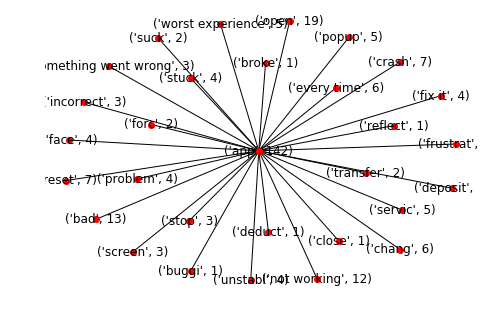

In [122]:
from sNetworkx import SNetworkx
snetworkx = SNetworkx()
t = sutility.getFamousTopics()[0]
r = sutility.getReasonDict()[0]
print('topic:', t)
print('reasons', r[1])
snetworkx.inputData(t, r[1])
snetworkx.show()

In [123]:
sutility.showTopicCounts()
print('---------------------------------')
sutility.showReasonDict()

[('app', 142), ('account', 58), ('login', 53), ('debit card', 39), ('updat', 38), ('upi', 25), ('customer care', 12), ('version', 11), ('atm', 8), ('kyc', 7), ('customer service', 7), ('look', 5), ('biometr', 4), ('balanc', 4), ('signup', 3), ('internet', 2), ('ifsc', 2), ('debit cards', 2), ('charg', 2), ('speed', 2), ('offer', 1), (None, 1), ('back option', 1), ('postal code', 1), ('deals and offers', 1), ('another bank', 1), ('international transactions', 1)]
---------------------------------
app
[('open', 19), ('bad', 13), ('not working', 12), ('reset', 7), ('crash', 7), ('every time', 6), ('chang', 6), ('popup', 5), ('worst experience', 5), ('servic', 5), ('unstabl', 4), ('stuck', 4), ('problem', 4), ('face', 4), ('fix it', 4), ('frustrat', 4), ('stop', 3), ('something went wrong', 3), ('screen', 3), ('incorrect', 3), ('forc', 2), ('suck', 2), ('transfer', 2), ('buggi', 1), ('close', 1), ('deduct', 1), ('reflect', 1), ('deposit', 1), ('broke', 1)]

account
[('open', 14), ('servic'

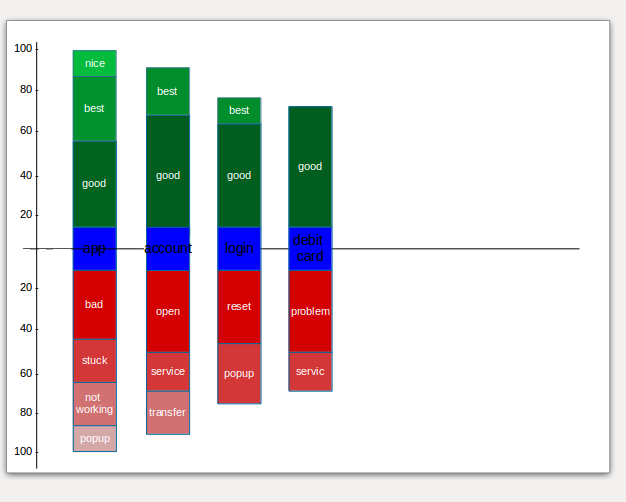

In [124]:
# from IPython.core.display import display, HTML
# # display(HTML('<h1>Hello, world!</h1>'))
# HTML(filename='g.html')
# from PIL import Image                                                                                
# img = Image.open('/home/nawaz/PycharmProjects/SentimentAnalysis/graphDemo.png')
# img.show() 

from IPython.display import Image

Image(filename = "/home/nawaz/PycharmProjects/SentimentAnalysis/graphDemo.png", width=500, height=500)

In [67]:
# sutility.showTopicCounts()
# sentList = commentsDocument.map()
# sentList = commentsDocument.map(getSentiment)

In [96]:
# from sGraph import *
# new1()
# makeHistogram()
# makeGraph()

In [57]:
l = list(commentsDocument)
p = list(processed_doc)

length = len(l)

for i in range(length):
    print(l[i])
    print(p[i])
    print()

In [29]:
# dump = list(zip(commentsDocument, processed_doc))
# length = len(dump)
# for i in range(length):
#     print(dump[i][0])
#     print(dump[i][1])
# #     print(sentList.iloc[i])
#     print()

In [62]:
import gensim
dictionary = gensim.corpora.Dictionary(processed_doc)
# dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_doc]

In [ ]:
from gensim import corpora, models
corpus_tfidf = models.TfidfModel(bow_corpus)[bow_corpus]

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=2, workers=2)

In [ ]:
# indexFor = 5
# print('..COMMENT :', commentsDocument[indexFor])
# print('\n..CORPOS :', processed_doc[indexFor])
# # print('\n..BOW:', bow_corpus[indexFor])
# for index, score in sorted(lda_model_tfidf[bow_corpus[indexFor]], key=lambda tup: -1*tup[1]):
#     print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 5)))

In [ ]:
topics = lda_model_tfidf.print_topics(num_words=4)
for topic in topics:
    print(topic)

In [ ]:
# print(processed_doc.values)

In [ ]:
l = tokenDictWithPosNegSentiment(list(sentList), list(processed_doc))


In [ ]:
# print(sortedMostPos(l))

In [ ]:
from showBarGraph import *
# show positive bar graph
showBarCharForSentiment(sortedMostPos(l), pos=True)

In [ ]:
# print(sortedMostNeg(l))
# show positive bar graph
showBarCharForSentiment(sortedMostNeg(l), pos=False)

In [ ]:
showPiChart(sortedMostFreq(l))

In [ ]:
# showTempBarChart()